In [1]:
import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Preprocessing import *
from utils.Plots import *
from utils.Segmentation import *

In [ ]:
# #Load the ESP1 Data and handle missing values
# df_one= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP1.csv')  
# missing_info = handle_missing_values_length_index(df_one)
# print(missing_info)
# output = '../../data/handlebar/Accelerometer_data_merged_ESP1_filled_missing_values.csv'
# fill_missing_values(df_one, output)
# missing_info = handle_missing_values_length_index(df_one)
# print(missing_info)


In [ ]:
# # Load the ESP2 Data and handle missing values
# df_two= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP2.csv')  
# missing_info = handle_missing_values_length_index(df_two)
# print(missing_info)
# output = '../../data/handlebar/Accelerometer_data_merged_ESP2_filled_missing_values.csv'
# fill_missing_values(df_two,output)
# missing_info = handle_missing_values_length_index(df_two)
# print(missing_info)


In [3]:
# Comine activities from ESP1 and ESP2 with correct Annotation
output = '../../data/handlebar/Accelerometer_data_combined.csv'
df_one= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP1_filled_missing_values.csv')
df_two= pd.read_csv('../../data/handlebar/Accelerometer_data_merged_ESP2_filled_missing_values.csv')
df_combined = combine_activities(df_one,df_two,output)

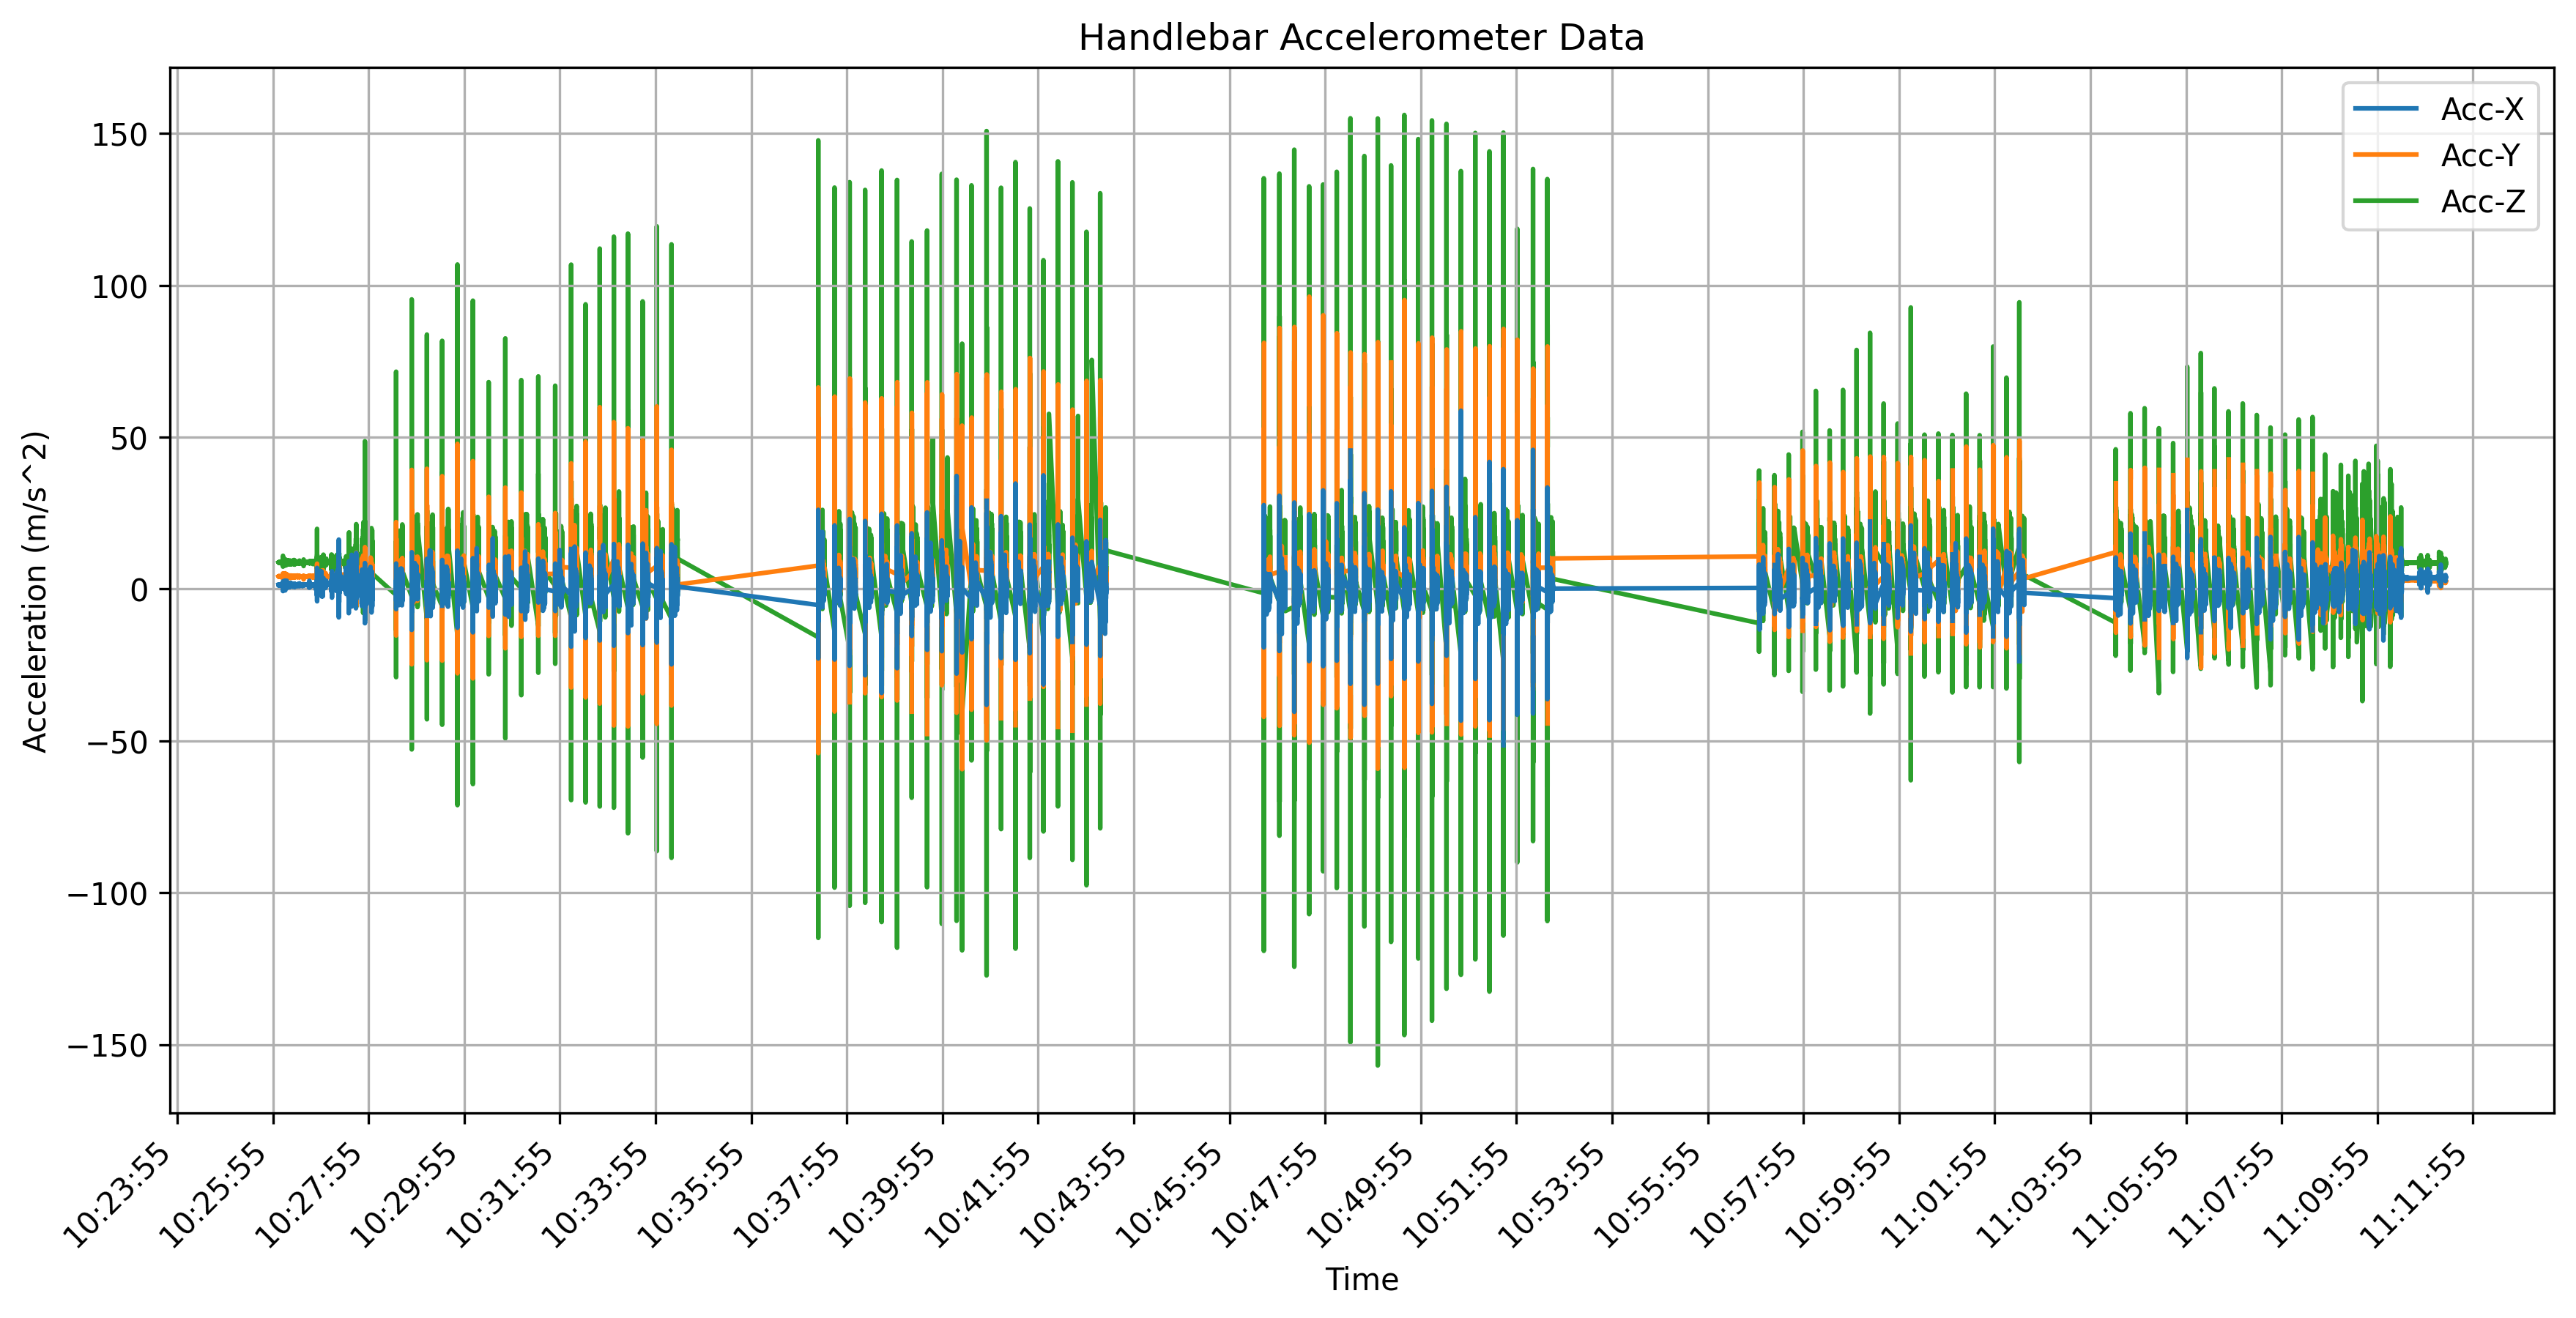

In [4]:
# plot the combined data
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
name = 'Handlebar Accelerometer Data'
plot_accelerometer_data(df, name)

In [2]:
# No overlapping segmentation and normal/abnormal classification
df= pd.read_csv('../../data/handlebar/Accelerometer_data_combined.csv')
output = '../../data/handlebar/Accelerometer_data_combined_segmented_overlap_50.csv'
# Filter the DataFrame to include only the necessary columns
df_filtered = df[['NTP','Acc-Z','curb_scene']]
final_df = segment_acceleration_data_overlapping_count_index(df_filtered, overlap=50, output=output)

In [3]:
df

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186641,549101,2024-07-24 11:11:20.851,3.806778,2.609680,8.777145,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
186642,549102,2024-07-24 11:11:20.857,3.758896,2.652771,8.681381,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
186643,549103,2024-07-24 11:11:20.866,3.763687,2.796432,8.370132,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
186644,549104,2024-07-24 11:11:20.870,3.734955,2.839523,8.307877,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0


In [ ]:
# Extra label for more functionality
# extra colum = curb_height
# situation 1:all cross curb down
if (df['curb_activity'] == 1.0) &(df['curb_type_down']) == 1.0:
    curb_height = df['curb_height_down'] 
# situation 2: cross ramp down
if (df['curb_activity'] == 1.0) &(df['curb_type_down']) == 2.0:
    curb_height = df['curb_height_down']
    


Number of curb down entries: 112862
Number of ramp down entries: 73784

Sample of rows with curb height:
   curb_activity  curb_type_down  curb_height_down  curb_height
0            1.0             1.0               1.0          1.0
1            1.0             1.0               1.0          1.0
2            1.0             1.0               1.0          1.0
3            1.0             1.0               1.0          1.0
4            1.0             1.0               1.0          1.0


In [ ]:
# Extra label for more functionality
# Create a new column for curb height
df['curb_height'] = 0.0  # Initialize with default value

# Create conditions for different situations
# Situation 1: cross curb down
mask_curb_down = (df['curb_activity'] == 1.0) & (df['curb_type_down'] == 1.0)
df.loc[mask_curb_down, 'curb_height'] = df.loc[mask_curb_down, 'curb_height_down']

# Situation 2: cross ramp down
mask_ramp_down = (df['curb_activity'] == 1.0) & (df['curb_type_down'] == 2.0)
df.loc[mask_ramp_down, 'curb_height'] = df.loc[mask_ramp_down, 'curb_height_down']

# Situation 3: 
if df['curb_height'].isnull().any():
    df['curb_height'] = df['curb_height'].fillna(0.0)  # Fill NaN values with 0.0


Unique values in curb_height_down for ramp down condition:
[3.]

Value counts for curb_height_down in ramp down condition:
curb_height_down
3.0    73784
Name: count, dtype: int64

Summary statistics for curb_height_down in ramp down condition:
count    73784.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: curb_height_down, dtype: float64

Example rows that match the condition:
        curb_activity  curb_type_down  curb_height_down
112862            1.0             2.0               3.0
112863            1.0             2.0               3.0
112864            1.0             2.0               3.0
112865            1.0             2.0               3.0
112866            1.0             2.0               3.0


In [7]:
# Example analysis of curb conditions
# Display rows where curb_activity is 1.0 and curb_type_up is 2.0
mask = (df['curb_activity'] == 1.0) & (df['curb_type_down'] == 2.0)
example_data = df[mask]
example_data

,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
112862,374989,2024-07-24 10:56:59.350,0.392654,10.735596,-11.252747,1.721819e+12,1.0,1.0,3.0,3.0,2.0,1.0,-1.0
112863,374990,2024-07-24 10:56:59.355,0.373489,3.715805,-17.568650,1.721819e+12,1.0,1.0,3.0,3.0,2.0,1.0,-1.0
112864,374991,2024-07-24 10:56:59.359,-0.407013,0.440536,-13.819336,1.721819e+12,1.0,1.0,3.0,3.0,2.0,1.0,-1.0
112865,374992,2024-07-24 10:56:59.366,-6.622360,-0.067032,-17.779343,1.721819e+12,1.0,1.0,3.0,3.0,2.0,1.0,-1.0
112866,374993,2024-07-24 10:56:59.369,-3.940857,4.118027,-11.003754,1.721819e+12,1.0,1.0,3.0,3.0,2.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186641,549101,2024-07-24 11:11:20.851,3.806778,2.609680,8.777145,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
186642,549102,2024-07-24 11:11:20.857,3.758896,2.652771,8.681381,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
186643,549103,2024-07-24 11:11:20.866,3.763687,2.796432,8.370132,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
186644,549104,2024-07-24 11:11:20.870,3.734955,2.839523,8.307877,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
